In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [56]:
dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
dt.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [57]:
df = dt.iloc[:,1].values

In [58]:
df = df.reshape(-1,1)
df = df.astype('float')

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
sc = MinMaxScaler(feature_range=(0,1))
df1 = sc.fit_transform(df)

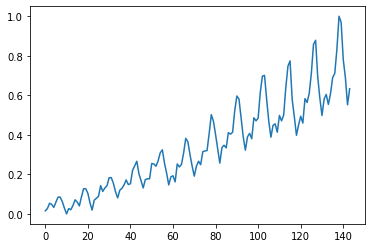

In [61]:
plt.plot(df1)

In [62]:
l = len(df1)
train = df1[0:int(0.6*l)]
test = df1[int(0.6*l):l]

In [63]:
T = 12
trainX = []
trainY = []
for t in range(len(train)-T-1):
  x = train[t:t+T,0]
  trainX.append(x)
  y = train[t+T,0]
  trainY.append(y)
trainX = np.array(trainX).reshape(-1,T,1)
trainY = np.array(trainY)

In [64]:
testX = []
testY = []
for t in range(len(test)-T-1):
  x = test[t:t+T,0]
  testX.append(x)
  y = test[t+T,0]
  testY.append(y)
testX = np.array(testX).reshape(-1,T,1)
testY = np.array(testY)  

In [65]:
from tensorflow.keras.layers import Dropout

In [66]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (trainX.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 30,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 20))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
r = regressor.fit(trainX, trainY, epochs = 250, batch_size = 50, validation_data = (testX,testY))

Epoch 1/250
2/2 [==============================] - 9s 1s/step - loss: 0.1212 - val_loss: 0.0799
Epoch 2/250
2/2 [==============================] - 0s 119ms/step - loss: 0.0374 - val_loss: 0.0261
Epoch 3/250
2/2 [==============================] - 0s 169ms/step - loss: 0.0274 - val_loss: 0.0663
Epoch 4/250
2/2 [==============================] - 0s 157ms/step - loss: 0.0158 - val_loss: 0.1311
Epoch 5/250
2/2 [==============================] - 0s 147ms/step - loss: 0.0123 - val_loss: 0.1223
Epoch 6/250
2/2 [==============================] - 0s 83ms/step - loss: 0.0111 - val_loss: 0.1152
Epoch 7/250
2/2 [==============================] - 0s 106ms/step - loss: 0.0104 - val_loss: 0.1024
Epoch 8/250
2/2 [==============================] - 0s 109ms/step - loss: 0.0081 - val_loss: 0.0774
Epoch 9/250
2/2 [==============================] - 0s 84ms/step - loss: 0.0105 - val_loss: 0.0541
Epoch 10/250
2/2 [==============================] - 0s 113ms/step - loss: 0.0109 - val_loss: 0.0421
Epoch 11/250
2

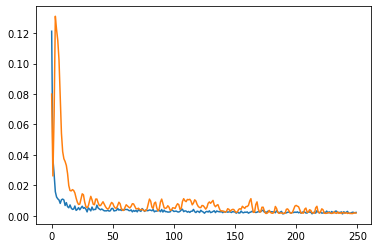

In [67]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
pred = regressor.predict(trainX)

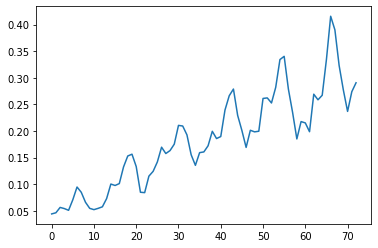

In [70]:
plt.plot(pred)

In [71]:
prd_test = regressor.predict(testX)

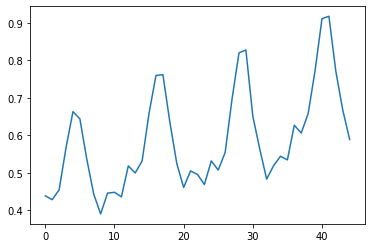

In [72]:
plt.plot(prd_test)

In [73]:
predplot = np.empty_like(df1)
predplot[:,:] = np.nan
predplot[T:len(trainX)+T,:] = sc.inverse_transform(pred)
pred_test = np.empty_like(df1)
pred_test[:,:] = np.nan
pred_test[len(pred)+2*T+1:len(df1)-1,:] = sc.inverse_transform(prd_test)
dff = sc.inverse_transform(df1)

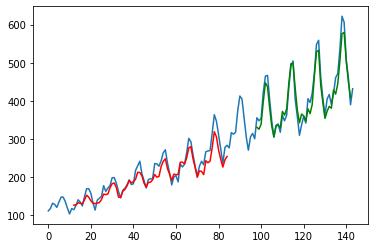

In [74]:
plt.plot(dff)
plt.plot(predplot, c='r')
plt.plot(pred_test, c='g')

In [75]:
from tensorflow.keras.layers import LSTM

In [76]:
model = Sequential()
model.add(LSTM(4,input_shape = (trainX.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [77]:
ls = model.fit(trainX,trainY, epochs=300, batch_size=1, verbose=2, validation_data=(testX,testY))

Epoch 1/300
73/73 - 2s - loss: 0.0172 - val_loss: 0.1114 - 2s/epoch - 30ms/step
Epoch 2/300
73/73 - 0s - loss: 0.0063 - val_loss: 0.0879 - 386ms/epoch - 5ms/step
Epoch 3/300
73/73 - 0s - loss: 0.0056 - val_loss: 0.0681 - 273ms/epoch - 4ms/step
Epoch 4/300
73/73 - 0s - loss: 0.0046 - val_loss: 0.0649 - 274ms/epoch - 4ms/step
Epoch 5/300
73/73 - 0s - loss: 0.0043 - val_loss: 0.0525 - 348ms/epoch - 5ms/step
Epoch 6/300
73/73 - 0s - loss: 0.0039 - val_loss: 0.0451 - 272ms/epoch - 4ms/step
Epoch 7/300
73/73 - 0s - loss: 0.0036 - val_loss: 0.0385 - 268ms/epoch - 4ms/step
Epoch 8/300
73/73 - 0s - loss: 0.0034 - val_loss: 0.0306 - 270ms/epoch - 4ms/step
Epoch 9/300
73/73 - 0s - loss: 0.0033 - val_loss: 0.0271 - 357ms/epoch - 5ms/step
Epoch 10/300
73/73 - 0s - loss: 0.0034 - val_loss: 0.0225 - 263ms/epoch - 4ms/step
Epoch 11/300
73/73 - 0s - loss: 0.0031 - val_loss: 0.0242 - 274ms/epoch - 4ms/step
Epoch 12/300
73/73 - 0s - loss: 0.0032 - val_loss: 0.0276 - 287ms/epoch - 4ms/step
Epoch 13/300
73

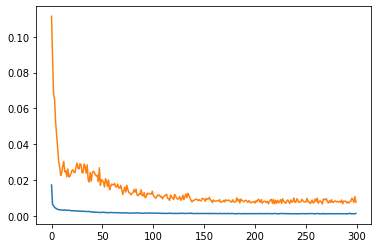

In [78]:
plt.plot(ls.history['loss'])
plt.plot(ls.history['val_loss'])

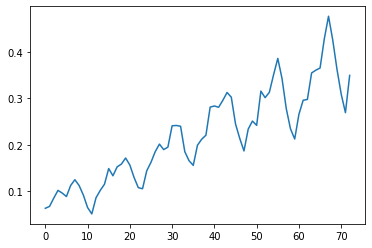

In [79]:
p_train = model.predict(trainX)
plt.plot(p_train)

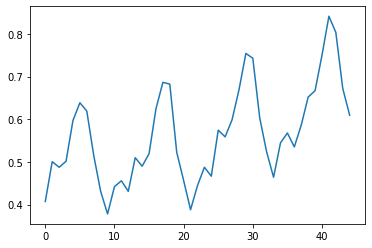

In [80]:
p_test = model.predict(testX)
plt.plot(p_test)

In [81]:
predplotlstm = np.empty_like(df1)
predplotlstm[:,:] = np.nan
predplotlstm[T:len(trainX)+T,:] = sc.inverse_transform(pred)
pred_testlstm = np.empty_like(df1)
pred_testlstm[:,:] = np.nan
pred_testlstm[len(pred)+2*T+1:len(df1)-1,:] = sc.inverse_transform(p_test)
dff = sc.inverse_transform(df1)

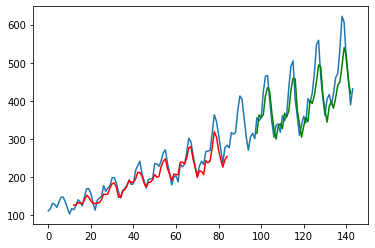

In [82]:
plt.plot(dff)
plt.plot(predplotlstm, c='r')
plt.plot(pred_testlstm, c='g')